### Практическое задание 2

<span style="color:blue"> **Задача №1**</span><br><br>
Найдите векторное произведение двух векторов:<br>

$\large\begin{equation}\vec{a} = \begin{bmatrix}-5\\3\\8\end{bmatrix},\ \vec{b} = \begin{bmatrix}2\\5\\1\end{bmatrix} \end{equation}$


In [1]:
import sympy as sp

In [2]:
a = sp.Matrix([[-5], [3], [8]])
b = sp.Matrix([[2],  [5], [1]])
r = sp.Matrix.cross(a, b)
r

Matrix([
[-37],
[ 21],
[-31]])

<span style="color:blue"> **Задача №2**</span><br><br>
Необходимо упростить выражение:<br>
$\large
\begin{align*}(\vec{a} + \vec{b} ) \times (\vec{a} - \vec{b})
\end{align*}$

In [3]:
import sympy as sp

In [4]:
# Описываем вектора 
ax, ay, az = sp.symbols('ax, ay, az')
bx, by, bz = sp.symbols('bx, by, bz')
a = sp.Matrix([ax, ay, az])
b = sp.Matrix([bx, by, bz])

# находим векторное произведение
c = sp.Matrix.cross(a+b, a-b)

In [5]:
# упрощаем выражение
sp.simplify(c)

Matrix([
[-2*ay*bz + 2*az*by],
[ 2*ax*bz - 2*az*bx],
[-2*ax*by + 2*ay*bx]])

<span style="color:blue"> **Задача №3**</span><br><br>
Все три вектора $\large\vec{a}, \vec{b},\vec{c}$ имеют длину $\large3$, и $\large\vec{a} + \vec{b} + \vec{c} = \vec{0}$.

Найдите результат вычисления: $\large\vec{a} \cdot \vec{b} + \vec{b} \cdot \vec{c} + \vec{c} \cdot \vec{a}$.


In [1]:
import math
import numpy as np
import sympy as sp
from sympy import Matrix
import matplotlib.pyplot as plt

In [2]:
# Если сумма трех векторов равна нулю и модули равны, то они образуют треугольник, 
# где начало первого вектора совпадает с концом третьего. 
# Учитывая равенство длин векторов - это равносторонний треугольник с углом 60 градусов.

# модули векторов
ma = mb = mc = 3

# находим угол между векторами (в рад.)
angle = 60 * math.pi/180

# формула для вычисления
a, b, c, alpha = sp.symbols("a, b, c, alpha")
f = sp.Function('f')
f = a*b*sp.cos(alpha) + b*c*sp.cos(alpha) + c*a*sp.cos(alpha)
f

a*b*cos(alpha) + a*c*cos(alpha) + b*c*cos(alpha)

In [3]:
# подставляем значения в формулу и получаем результат 
result = f.subs({a:ma, b:mb, c:mc, alpha:angle})
print("Результат вычисления: {:.2f}".format(result))

Результат вычисления: 13.50


___
##### Проверим углы, со значениями длин, отобразив на графике:

In [4]:
# Рассчитаем матрицы точек для векторов с предполагаемым углом
AB = Matrix([
    [.0, .0], 
    [ma * sp.cos(angle), ma * sp.sin(angle)]
])
BC = Matrix([
    [mb * sp.cos(angle), mb * sp.sin(angle)], 
    [2 * (mb * sp.cos(angle)), .0]
])
CA = Matrix([
    [2 * (mc * sp.cos(angle)), .0], 
    [.0, .0]
])

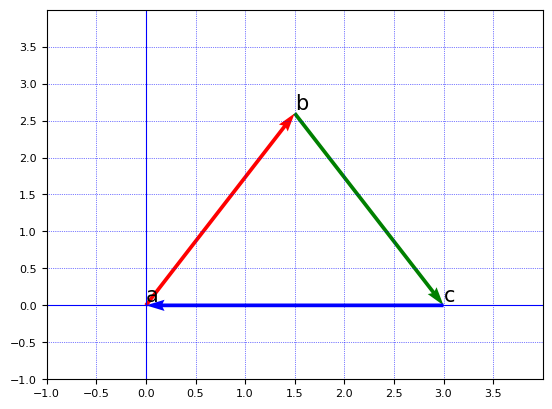

In [6]:
def displayVec(points: Matrix, caption: str, color: str):
    """ Выводит на график объект-стрелку, 
        по указанным координатам вектора.
    """
    global ax
    if points.shape == (2, 2):
        xx, yy = points[:,0], points[:,1]
        ax.quiver(
            float(xx[0]), float(yy[0]), 
            float(xx[1]-xx[0]), float(yy[1]-yy[0]), 
            color=color, angles='xy', scale_units='xy', scale=1)
        ax.text(xx[0], yy[0], s=caption, fontsize=15, color='k', va='bottom')
        
fig, ax = plt.subplots()
plt.grid(visible=True, which='both', axis='both', color='b', linestyle='dotted', linewidth=.5) 
ax.axhline(y=0, lw=0.8, color='b')
ax.axvline(x=0, lw=0.8, color='b')
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 4)
ax.set_yticks(np.arange(-1, 4, .5))
ax.set_xticks(np.arange(-1, 4, .5))
ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)

displayVec(AB, 'a', color='r')
displayVec(BC, 'b', color='g')
displayVec(CA, 'c', color='b')

plt.show()